In [ ]:
import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder

healthcare = pd.read_csv("/content/drive/MyDrive/Colab/healthcare-dataset-stroke-data.csv")
le = LabelEncoder()
healthcare.smoking_status = le.fit_transform(healthcare.smoking_status)
healthcare.gender = le.fit_transform(healthcare.gender)
healthcare.ever_married = le.fit_transform(healthcare.ever_married)
healthcare.work_type = le.fit_transform(healthcare.work_type)
healthcare.Residence_type = le.fit_transform(healthcare.Residence_type)
myList = [row for row in healthcare.values]
myArr = np.array(myList)

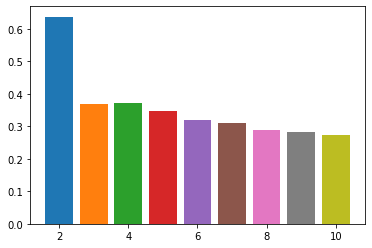

In [ ]:
def get_kscore(k):
  km = cluster.KMeans(n_clusters=k) #看你的資料要分幾種結果(iris是三種)
  km.fit(myArr[:, 1:11])
  return metrics.silhouette_score(myArr[:, 1:11], km.labels_) #算出來的數值越大分類得越好)

for k in range(2, 11):
  plt.bar(k, get_kscore(k))

In [ ]:
ac = cluster.AgglomerativeClustering(n_clusters=2)
ac.fit(myArr[:, 1:11])
ac.labels_

array([1, 1, 0, ..., 0, 1, 0])

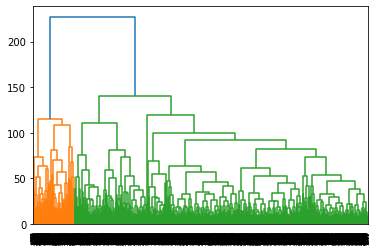

In [ ]:
from scipy.cluster import hierarchy
Z = hierarchy.linkage(myArr[:, 1:11], method = "complete") #single or complete
hierarchy.dendrogram(Z)
plt.show()

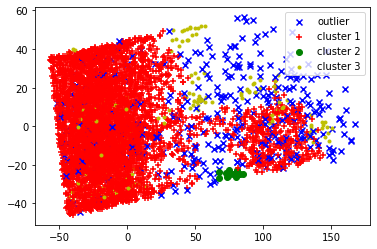

In [ ]:
from sklearn import decomposition as dc
pca = dc.PCA(10)
mydata = pca.fit_transform(myArr[:, 1:11])

def draw(d):
  for point in d:
    if point[10] == -1:
      c0 = plt.scatter(point[0], point[1], c='b', marker = 'x')
    elif point[10] == 0:
      c1 = plt.scatter(point[0], point[1], c='r', marker = '+')
    elif point[10] == 1:
      c2 = plt.scatter(point[0], point[1], c='g', marker = 'o')
    else:
      c3 = plt.scatter(point[0], point[1], c='y', marker = '.')
  plt.legend([c0, c1, c2, c3], ['outlier', 'cluster 1', 'cluster 2', 'cluster 3'])

ds = cluster.DBSCAN(eps=6.5, min_samples=5) #esp = radius(半徑越小越多群), min_samples = 圈圈內有幾個樣本(數字越大群越少)
ds.fit(mydata) #ds.labels_ -1 is outlier
labels_ = [[x] for x in ds.labels_]

datatodraw = np.concatenate((mydata, labels_), axis = 1)
draw(datatodraw)